In [2]:
5+6

11

In [1]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.8 MB 7.5 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.8 MB 7.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.8 MB 7.8 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.8 MB 7.9 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.8 MB 7.5 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.8 MB 6.7 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.8 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.8/8.8 MB 5.7 MB/s  0:00:01
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
    --------------------------------------- 0.5/39.4 MB 3.5 MB/s eta 0:00:12
   - -------------------------------------- 1.3/39.4 MB 3.4 MB/s eta 0:00:12
   -- ------------------------------------- 2.1/39.4 MB 3.5 MB/s eta 0:00:11
   -- -------------------

In [2]:
!pip install seaborn matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.3 MB 10.5 MB/s eta 0:00:01
   ---------------------- ----------------- 4.7/8.3 MB 12.1 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.3 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.3 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 10.2 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 3.7 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 3.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.8/2.3 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 2.9 MB/s  0:00:00
   ---------------------------------------- 0.0/7.1 MB ? eta -

In [4]:
!pip install matplotlib

In [5]:
!pip install pandas

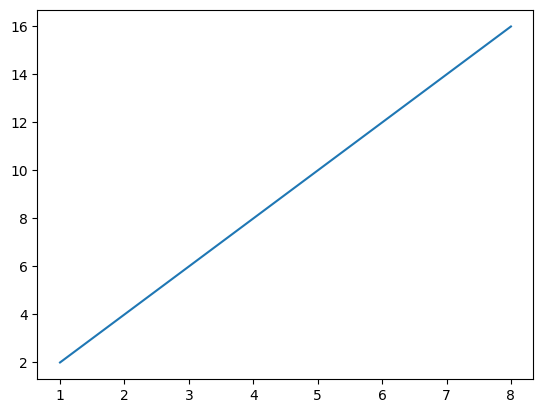

In [9]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8]
y=[2,4,6,8,10,12,14,16]
plt.plot(x,y)
plt.show()

In [7]:
import pandas as pd


df = pd.read_csv('hotel_bookings.csv')



(119390, 32)


In [8]:

df = df[df['adults'] + df['children'] + df['babies'] > 0]
print(f"Строк после удаления бронирований без гостей: {df.shape[0]}")

Строк после удаления бронирований без гостей: 119206


In [9]:

df = df[df['adr'] != 0]
print(f"Строк после удаления нулевой ADR: {df.shape[0]}")

Строк после удаления нулевой ADR: 117396


In [27]:

df['company'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)

In [28]:
)
most_common_country = df['country'].mode()[0]


df['country'].fillna(most_common_country, inplace=True)

In [29]:
# Заполняем пропуски медианой
median_children = df['children'].median()
df['children'].fillna(median_children, inplace=True)

df['children'] = df['children'].astype('int')

In [30]:
print("\nПроверка пропусков после предобработки:")
print(df.isnull().sum().max()) 


Проверка пропусков после предобработки:
0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


try:
    df = pd.read_csv('hotel_bookings.csv')
except FileNotFoundError:
    print("Ошибка: Файл 'hotel_bookings.csv' не найден. Проверьте путь.")
    raise


df.drop(['company', 'agent'], axis=1, inplace=True, errors='ignore')
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(0, inplace=True)
df = df[df['adr'] >= 0] 
df = df[df['adults'] + df['children'] + df['babies'] > 0]


df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True) 


y = df['is_canceled'] 
X = df.drop('is_canceled', axis=1)
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f" Переменная df успешно создана. X_train размер: {X_train.shape}")

 Переменная df успешно создана. X_train размер: (95367, 243)


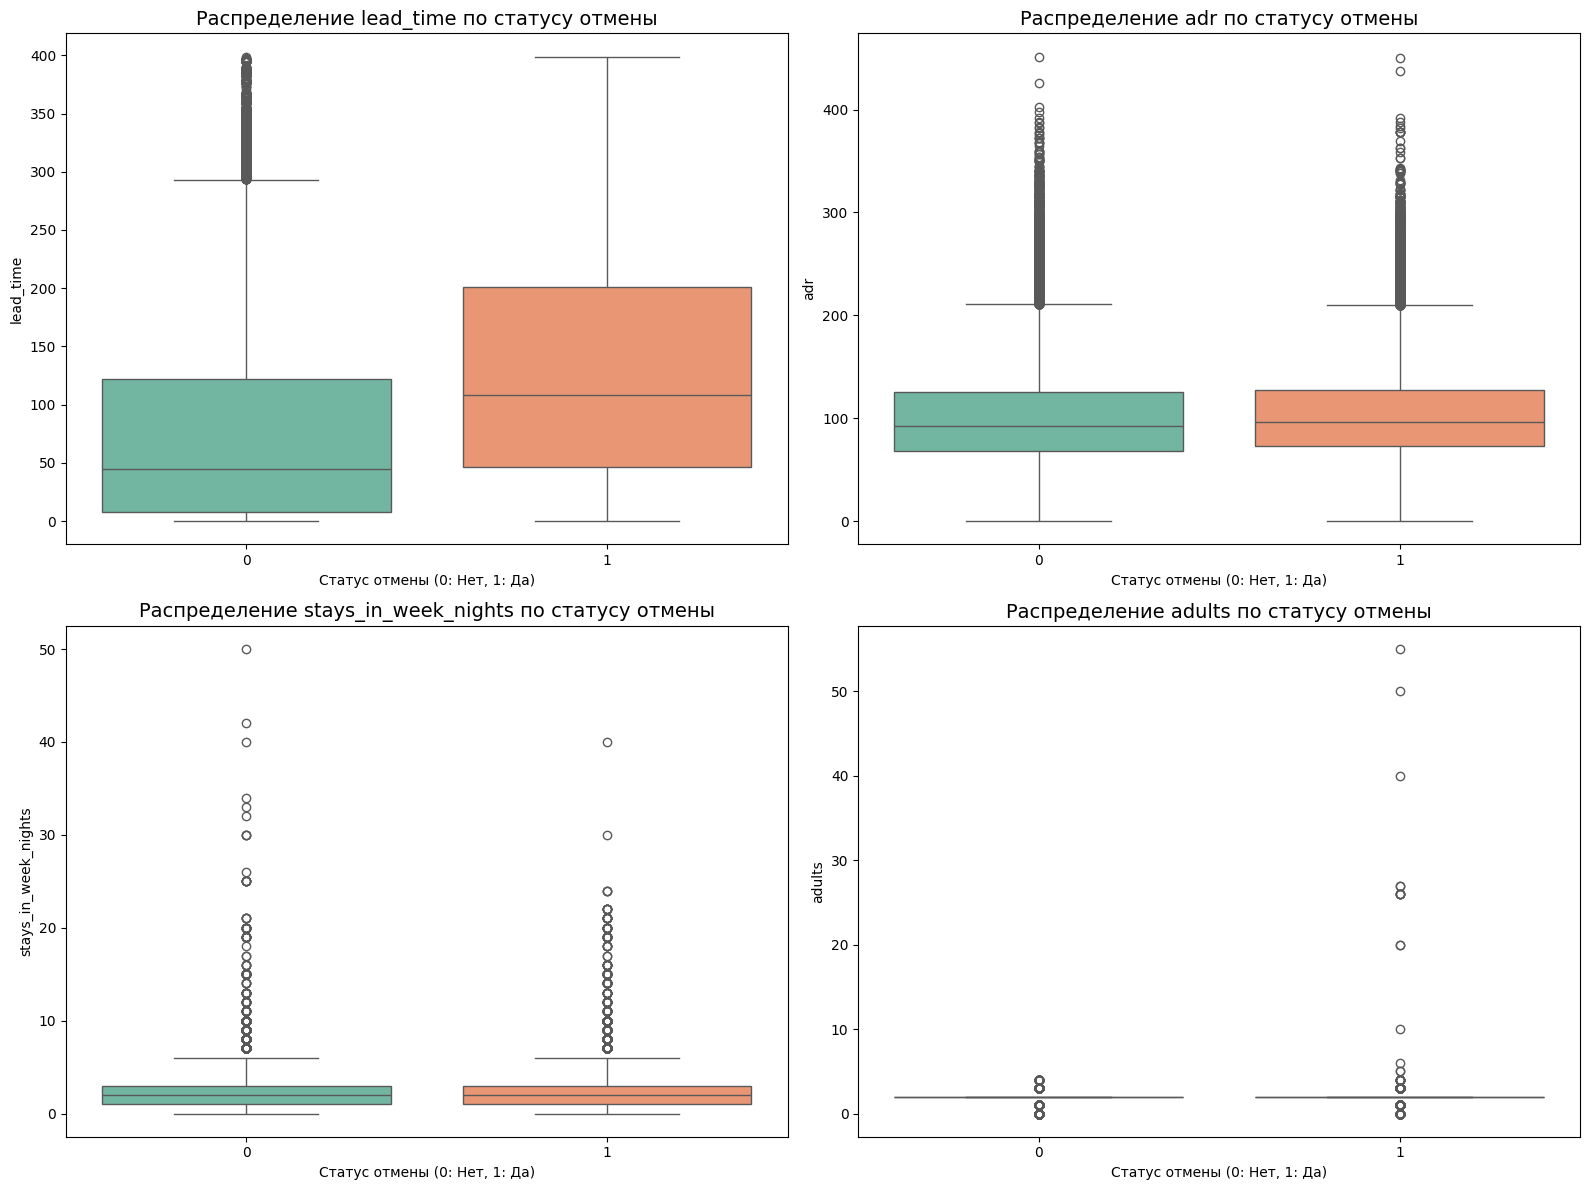

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



box_plot_features = [
    'lead_time', 
    'adr', 
    'stays_in_week_nights', 
    'adults'
]


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() 


for i, feature in enumerate(box_plot_features):
    
    if feature == 'adr':
        data_to_plot = df[df[feature] < 500]
    elif feature == 'lead_time':
        data_to_plot = df[df[feature] < 400]
    else:
        data_to_plot = df
        
    
    sns.boxplot(
        x='is_canceled', 
        y=feature, 
        data=data_to_plot, 
        ax=axes[i],
        palette='Set2', 
        
        hue='is_canceled',
        legend=False 
    )
    
    
    axes[i].set_title(f'Распределение {feature} по статусу отмены', fontsize=14)
    axes[i].set_xlabel('Статус отмены (0: Нет, 1: Да)')
    axes[i].set_ylabel(feature)

plt.tight_layout() 
plt.show()

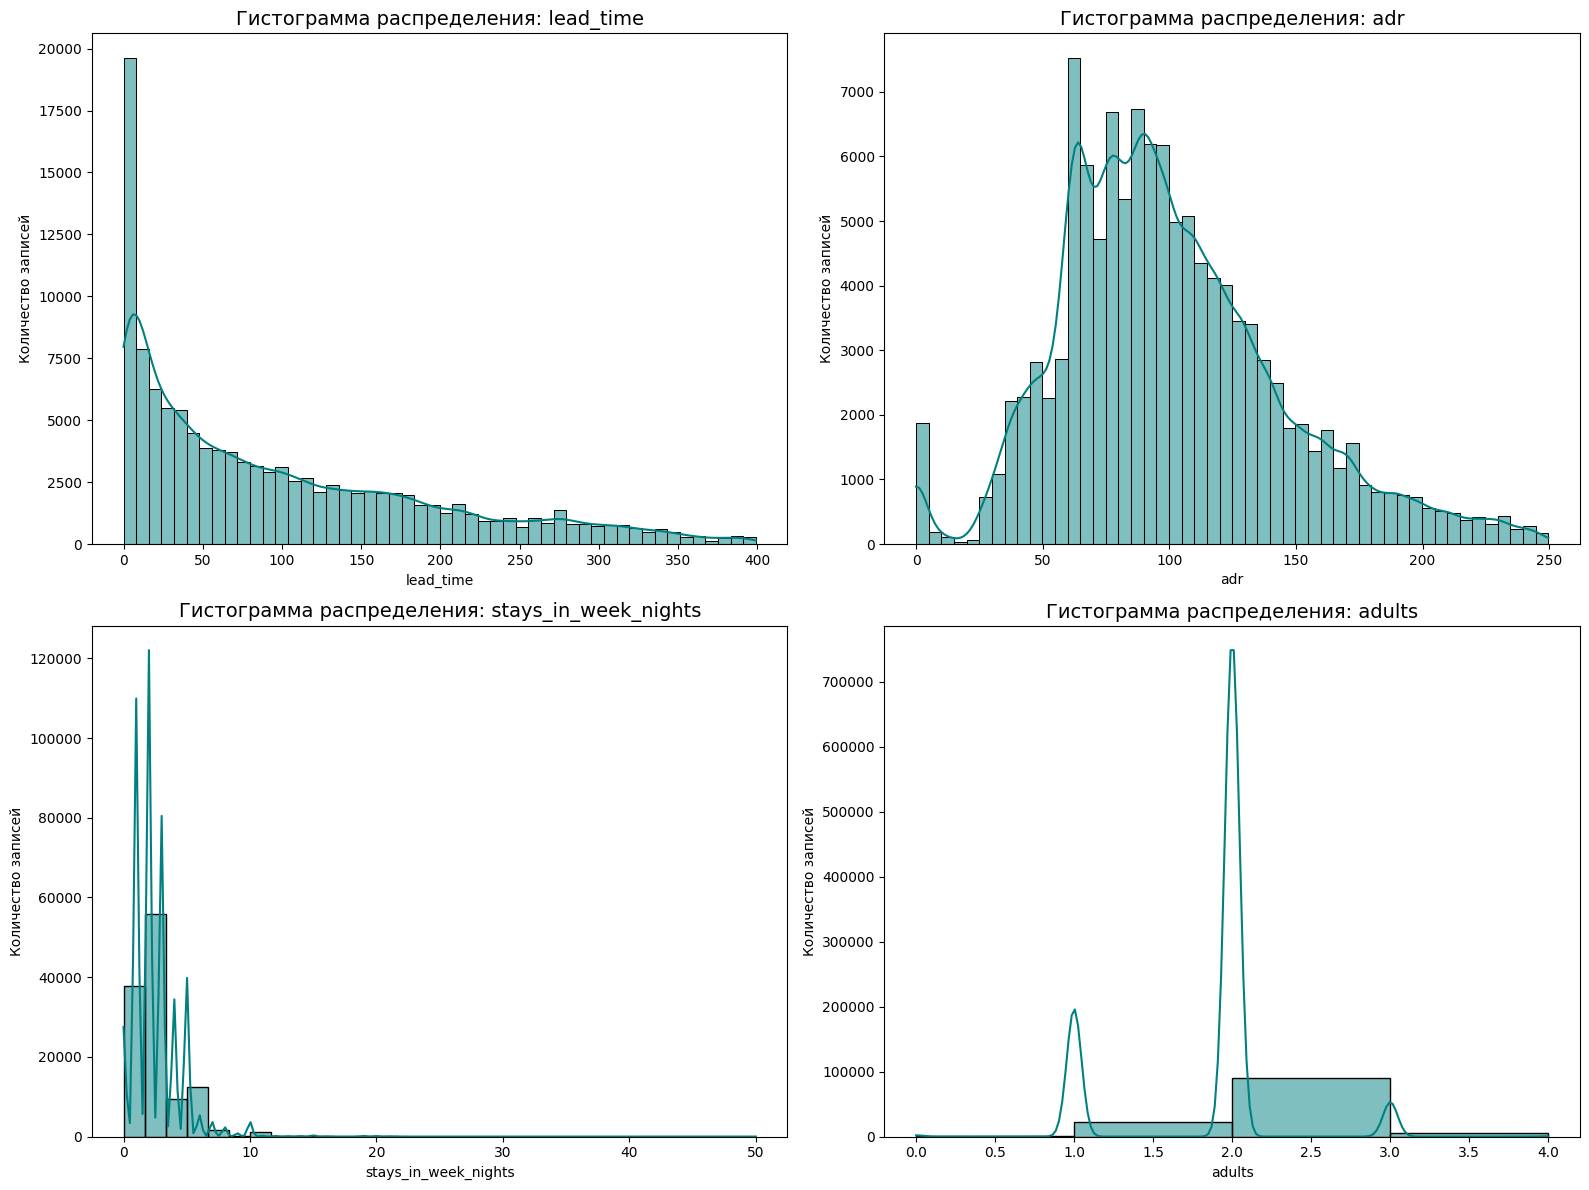

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


hist_features = [
    'lead_time', 
    'adr', 
    'stays_in_week_nights', 
    'adults'
]


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() 


for i, feature in enumerate(hist_features):
    
    
    
    data_to_plot = df.copy()
    
    if feature == 'adr':
        
        data_to_plot = data_to_plot[data_to_plot[feature] < 250]
        bins = 50
    elif feature == 'lead_time':
        
        data_to_plot = data_to_plot[data_to_plot[feature] < 400]
        bins = 50
    elif feature == 'adults':
       
        data_to_plot = data_to_plot[data_to_plot[feature] <= 4]
        bins = data_to_plot[feature].max()
    else:
        bins = 30
    
    
    sns.histplot(
        data=data_to_plot, 
        x=feature, 
        kde=True, 
        bins=bins, 
        ax=axes[i],
        color='teal'
    )
    
   
    axes[i].set_title(f'Гистограмма распределения: {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Количество записей')

plt.tight_layout() 
plt.show()

<Figure size 1500x1500 with 0 Axes>

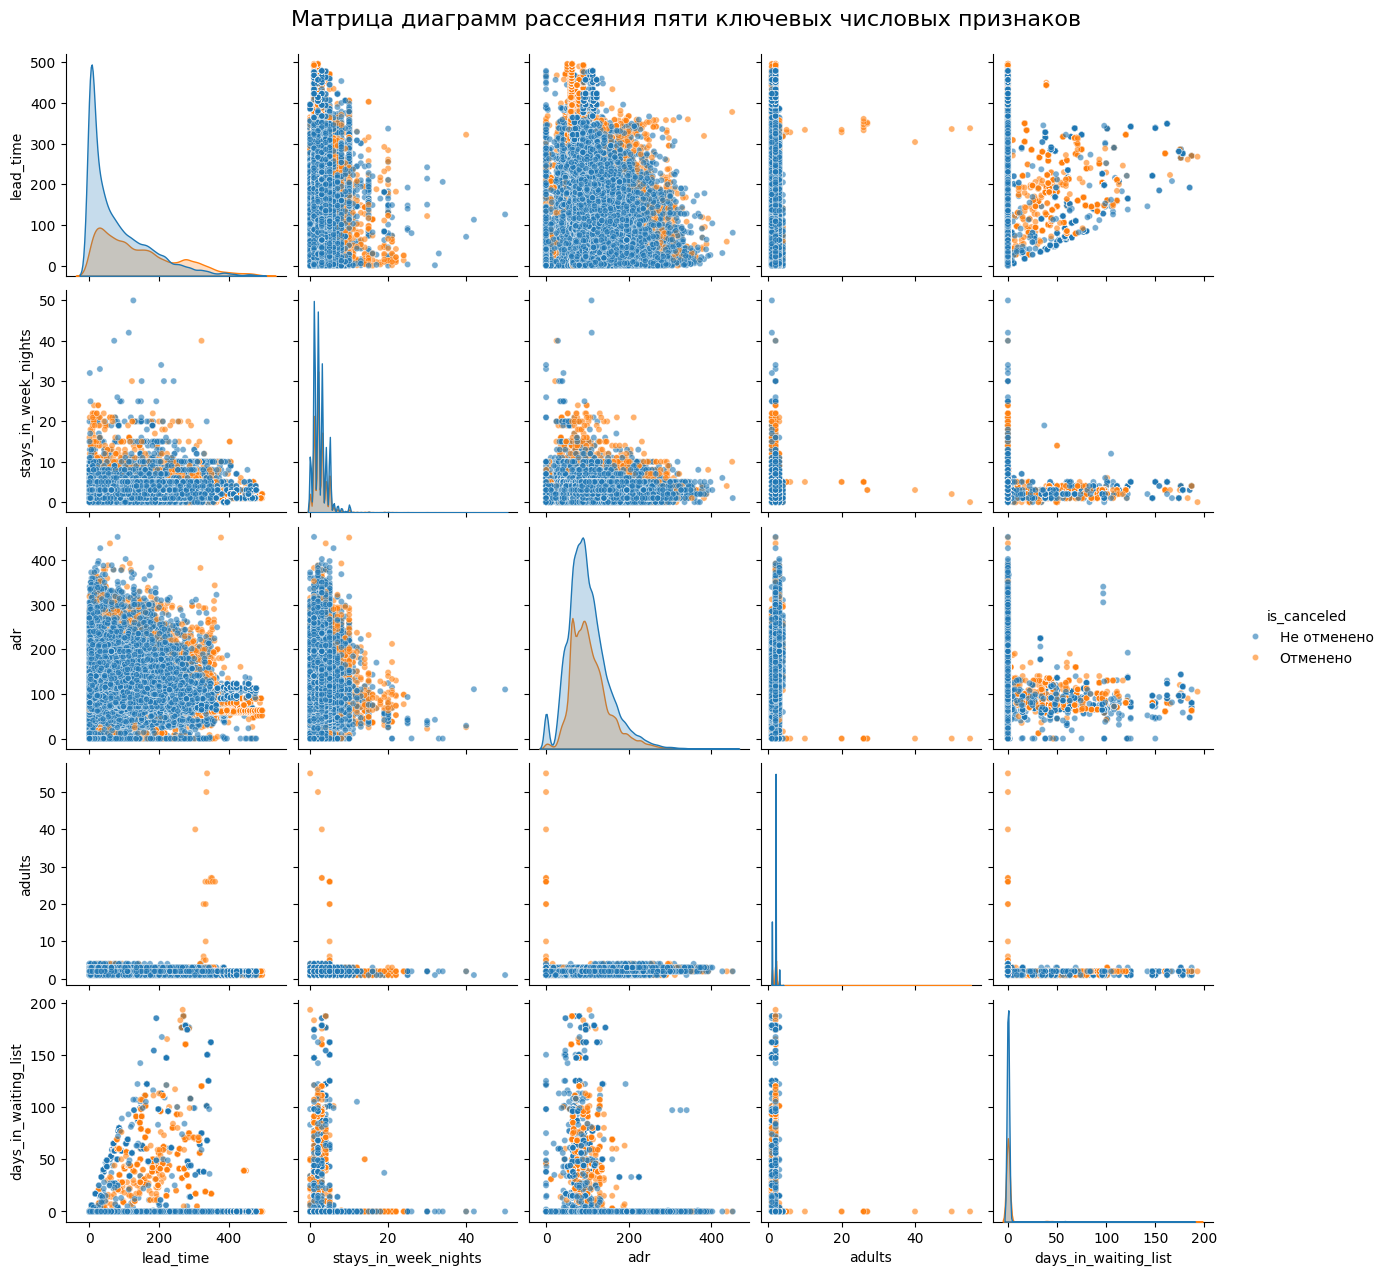

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




features_for_pairplot = [
    'lead_time', 
    'stays_in_week_nights', 
    'adr', 
    'adults',           
    'days_in_waiting_list', 
    'is_canceled'
]


df_plot = df[features_for_pairplot].copy()



df_plot = df_plot[(df_plot['lead_time'] < 500) & (df_plot['adr'] < 500)]

df_plot = df_plot[df_plot['adults'] > 0]

df_plot = df_plot[df_plot['days_in_waiting_list'] < 200]


df_plot['is_canceled'] = df_plot['is_canceled'].astype(str).replace({'0': 'Не отменено', '1': 'Отменено'})

plt.figure(figsize=(15, 15)) 
sns.pairplot(
    data=df_plot, 
    hue='is_canceled', 
    vars=['lead_time', 'stays_in_week_nights', 'adr', 'adults', 'days_in_waiting_list'], 
    diag_kind='kde', 
    plot_kws={'alpha': 0.6, 's': 20}
)
plt.suptitle('Матрица диаграмм рассеяния пяти ключевых числовых признаков', y=1.02, fontsize=16)
plt.show()

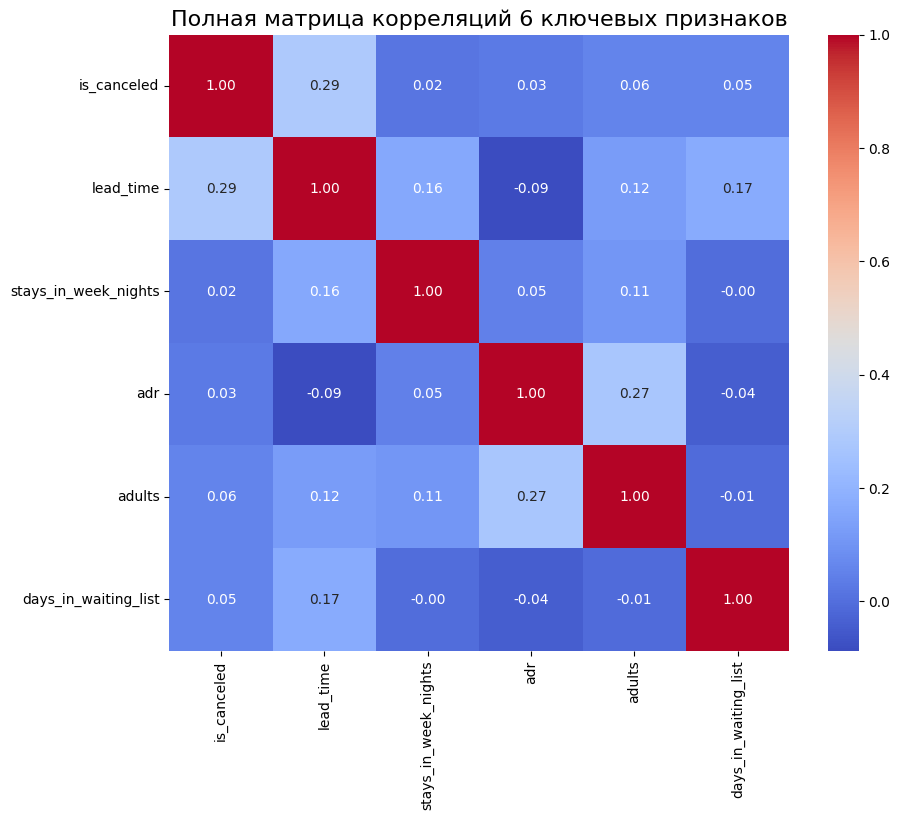

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




key_features = [
    'is_canceled',          
    'lead_time',            
    'stays_in_week_nights', 
    'adr',                  
    'adults',               
    'days_in_waiting_list'  
]


corr_matrix_subset = df[key_features].corr()


plt.figure(figsize=(10, 8)) 
sns.heatmap(
    corr_matrix_subset, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True 
    
)
plt.title("Полная матрица корреляций 6 ключевых признаков", fontsize=16)
plt.show()

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier 

print("\n--- Обучение KNN ---")


knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsClassifier()


knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=4, verbose=1)


print("Начинается обучение KNN...")
knn_grid.fit(X_train, y_train)


y_pred_knn = knn_grid.predict(X_test)


y_proba_knn = knn_grid.predict_proba(X_test)[:, 1]


print(f"\nЛучшие параметры KNN: {knn_grid.best_params_}")


knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test, y_proba_knn)

print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN ROC-AUC: {knn_roc_auc:.4f}")

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Не отменено (0)', 'Отменено (1)']))


best_knn = knn_grid.best_estimator_


--- Обучение KNN ---
Начинается обучение KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Лучшие параметры KNN: {'n_neighbors': 5}
KNN Accuracy: 0.8227
KNN ROC-AUC: 0.8904

KNN Classification Report:
                 precision    recall  f1-score   support

Не отменено (0)       0.85      0.87      0.86     15002
   Отменено (1)       0.77      0.74      0.76      8840

       accuracy                           0.82     23842
      macro avg       0.81      0.81      0.81     23842
   weighted avg       0.82      0.82      0.82     23842



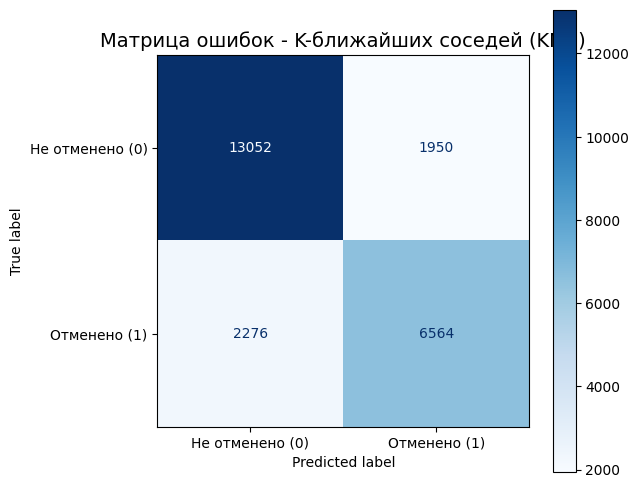

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


LABELS = ['Не отменено (0)', 'Отменено (1)']




cm_knn = confusion_matrix(y_test, y_pred_knn)


disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=LABELS)


plt.figure(figsize=(6, 6))

disp_knn.plot(cmap="Blues", values_format='d', ax=plt.gca()) 
plt.title("Матрица ошибок - K-ближайших соседей (KNN)", fontsize=14)
plt.show()


--- KNN Classification Report ---
                 precision    recall  f1-score   support

Не отменено (0)       0.85      0.87      0.86     15002
   Отменено (1)       0.77      0.74      0.76      8840

       accuracy                           0.82     23842
      macro avg       0.81      0.81      0.81     23842
   weighted avg       0.82      0.82      0.82     23842

KNN ROC-AUC: 0.8904


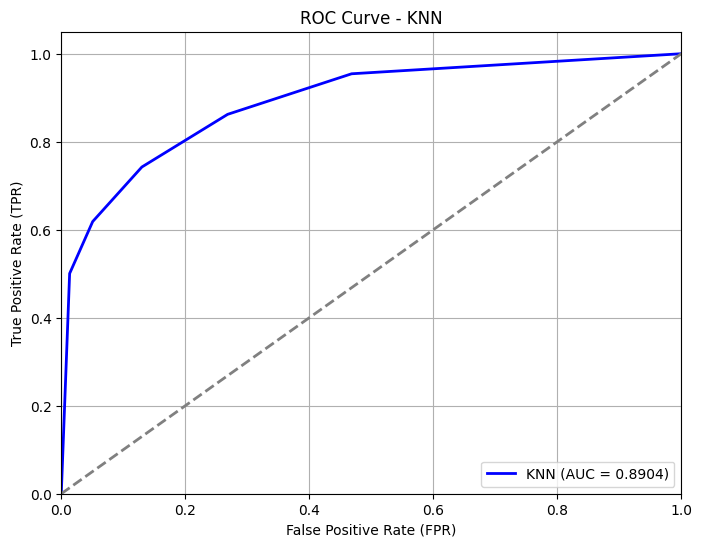

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve



print("\n--- KNN Classification Report ---")

print(classification_report(y_test, y_pred_knn, target_names=['Не отменено (0)', 'Отменено (1)']))

#  Расчет ROC-AUC


y_pred_proba_knn = y_proba_knn 

roc_auc = roc_auc_score(y_test, y_pred_proba_knn)
print(f"KNN ROC-AUC: {roc_auc:.4f}")

#  Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"KNN (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2) # Базовая линия (случайное угадывание)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


--- Обучение SVM ---
Начинается обучение SVM. Будьте терпеливы...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Лучшие параметры SVM: {'C': 1, 'kernel': 'rbf'}
SVM Accuracy: 0.8449
SVM ROC-AUC: 0.9173

SVM Classification Report:
                 precision    recall  f1-score   support

Не отменено (0)       0.84      0.93      0.88     15002
   Отменено (1)       0.85      0.71      0.77      8840

       accuracy                           0.84     23842
      macro avg       0.85      0.82      0.83     23842
   weighted avg       0.85      0.84      0.84     23842



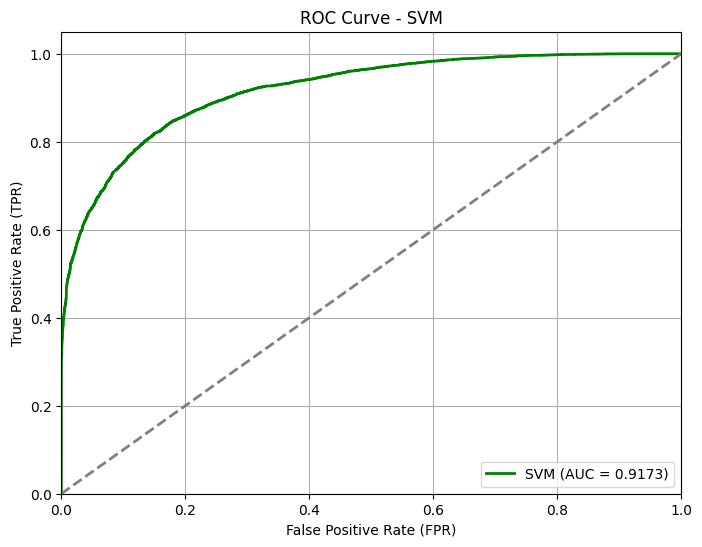

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Метод опорных векторов (SVM)
print("\n--- Обучение SVM ---")
svm_params = {
    'C': [1], 
    'kernel': ['rbf'] 
}
svm = SVC(random_state=42, probability=True) 


svm_grid = GridSearchCV(svm, svm_params, cv=3, scoring='accuracy', n_jobs=4, verbose=1) 



print("Начинается обучение SVM. Будьте терпеливы...")
svm_grid.fit(X_train, y_train) 


y_pred_svm = svm_grid.predict(X_test)
y_proba_svm = svm_grid.predict_proba(X_test)[:, 1]
best_svm = svm_grid.best_estimator_


print(f"Лучшие параметры SVM: {svm_grid.best_params_}")


svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_proba_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM ROC-AUC: {svm_roc_auc:.4f}")


print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Не отменено (0)', 'Отменено (1)']))


fpr, tpr, _ = roc_curve(y_test, y_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f"SVM (AUC = {svm_roc_auc:.4f})")
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

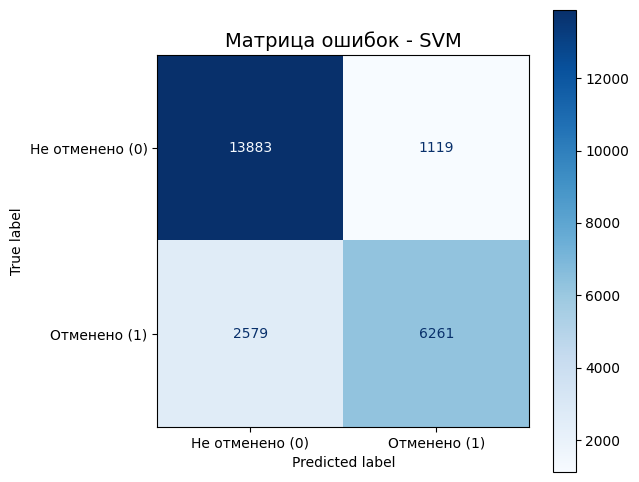

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np




LABELS = ['Не отменено (0)', 'Отменено (1)']


cm_svm = confusion_matrix(y_test, y_pred_svm)


disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=LABELS)

plt.figure(figsize=(6, 6))

disp_svm.plot(cmap="Blues", values_format='d', ax=plt.gca()) 
plt.title("Матрица ошибок - SVM", fontsize=14)
plt.show()

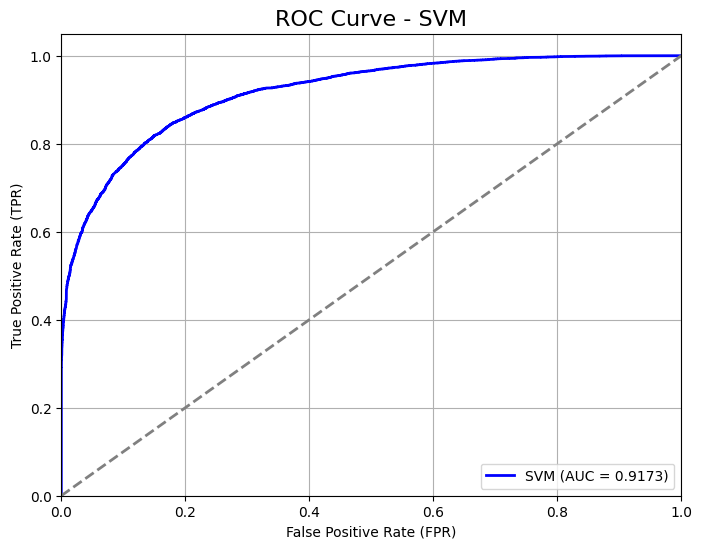

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np



plt.figure(figsize=(8, 6))

#  Расчет и построение ROC-кривой для SVM

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, 
         label=f'SVM (AUC = {roc_auc_svm:.4f})')


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - SVM', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


try:
    df = pd.read_csv('hotel_bookings.csv')
except FileNotFoundError:
    print("Ошибка: Файл 'hotel_bookings.csv' не найден. Проверьте путь.")
    raise


df.drop(['company', 'agent'], axis=1, inplace=True, errors='ignore')
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(0, inplace=True)
df = df[df['adr'] >= 0] 
df = df[df['adults'] + df['children'] + df['babies'] > 0]


df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True) 


y = df['is_canceled'] 
X = df.drop('is_canceled', axis=1)
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f" Данные успешно подготовлены. Признаки-утечки удалены. X_train размер: {X_train.shape}")

 Данные успешно подготовлены. Признаки-утечки удалены. X_train размер: (95367, 243)


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

print("\n--- 4.2.3 Случайный лес (Random Forest) ---")


rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [5, 7, 10]}
rf = RandomForestClassifier(random_state=42)


rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=2, verbose=1)


print("Начинается обучение Random Forest с ограниченными ресурсами...")
rf_grid.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf_grid.predict(X_test)


y_proba_rf = rf_grid.predict_proba(X_test)[:, 1]


print(f"\nЛучшие параметры Random Forest: {rf_grid.best_params_}")


rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_proba_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Не отменено (0)', 'Отменено (1)']))

best_rf = rf_grid.best_estimator_


--- 4.2.3 Случайный лес (Random Forest) ---
Начинается обучение Random Forest с ограниченными ресурсами...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

Лучшие параметры Random Forest: {'max_depth': 10, 'n_estimators': 50}
Random Forest Accuracy: 0.7906
Random Forest ROC-AUC: 0.9166

Random Forest Classification Report:
                 precision    recall  f1-score   support

Не отменено (0)       0.75      0.99      0.86     15002
   Отменено (1)       0.96      0.45      0.62      8840

       accuracy                           0.79     23842
      macro avg       0.86      0.72      0.74     23842
   weighted avg       0.83      0.79      0.77     23842



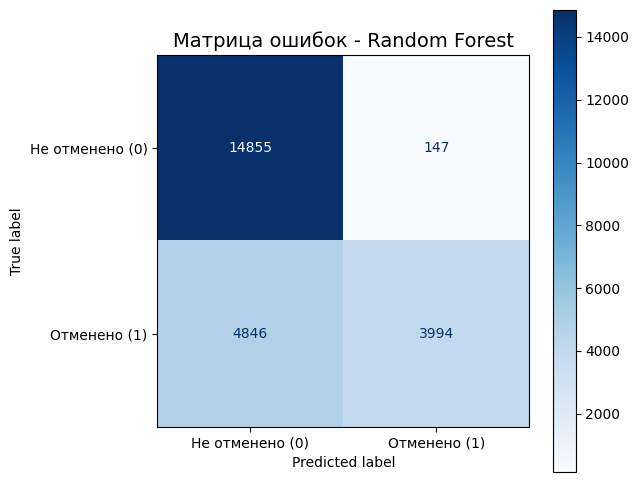

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np




LABELS = ['Не отменено (0)', 'Отменено (1)']


cm_rf = confusion_matrix(y_test, y_pred_rf)


disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=LABELS)

plt.figure(figsize=(6, 6))


disp_rf.plot(cmap="Blues", values_format='d', ax=plt.gca())
plt.title("Матрица ошибок - Random Forest", fontsize=14)
plt.show()

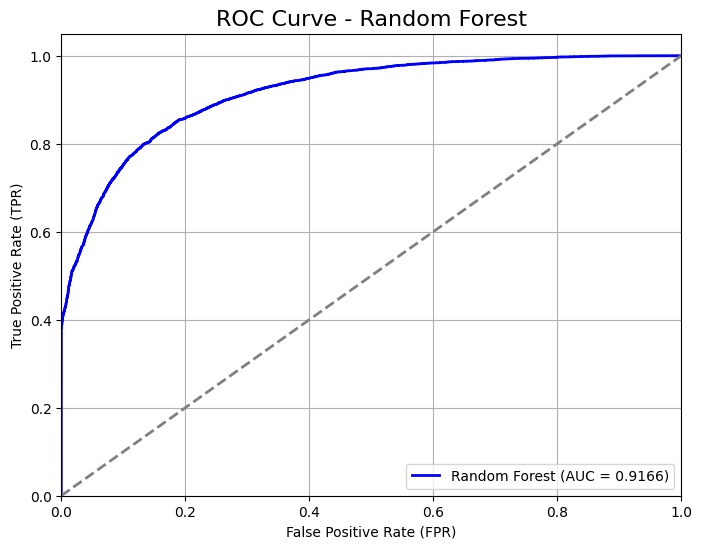

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np



plt.figure(figsize=(8, 6))


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})')


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()